PyTorch est une bibliothèque open-source développée par Facebook AI, conçue pour le calcul tensoriel et l’apprentissage profond. Il est apprécié pour sa flexibilité, son interface intuitive et son exécution dynamique (contrairement à TensorFlow avant TF 2.0, qui utilisait des graphes statiques).



✅ Pourquoi PyTorch ?
Exécution dynamique : On peut exécuter le modèle "au fil de l'eau", ce qui est plus intuitif pour le débogage.
Support GPU natif : Facilement compatible avec CUDA pour accélérer les calculs sur GPU.
API simple et Pythonique : Plus facile à apprendre par rapport à d'autres frameworks.
Forte communauté et support : Beaucoup de ressources et de tutoriels disponibles.


Un objet torch.Tensor en PyTorch est la structure de données de base utilisée pour stocker des informations numériques dans des réseaux de neurones. Il est similaire à un tableau multidimensionnel (comme un tableau NumPy) mais avec des fonctionnalités supplémentaires permettant de faire des calculs sur des GPU, ce qui accélère considérablement les processus.

In [ ]:
#https://chatgpt.com/c/67c0834c-c538-8002-b3e2-c11ae37f30b5
# Rappels sur les tensors

In [2]:
# tensor from Numpy
import torch
import numpy as np
np_array = np.array([1, 2, 3])
tensor_from_numpy = torch.from_numpy(np_array)
print(tensor_from_numpy)

tensor([1, 2, 3])


In [ ]:
!pip install torch torchvision torchaudio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [3]:
import torch
print(torch.__version__)  # Vérifier la version installée
print(torch.cuda.is_available())  # Vérifier si CUDA est dispo
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms


2.5.1+cu124
True


In [ ]:
!nvidia-smi

Thu Feb 27 14:48:44 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import torchvision # bibliothèque PyTorch qui fournit des datasets populaires, des transformations d'images, et des modèles pré-entraînés
import torchvision.transforms as transforms #ermet d'appliquer des prétraitements aux images (ex: conversion en tenseurs, normalisation, augmentation...).
import torch

In [4]:
transform = transforms.Compose([ #un conteneur qui applique plusieurs transformations dans l'ordre.
    transforms.ToTensor(), # 1erer transfo: Convertit une image PIL (ou NumPy ndarray) en tensor PyTorch (torch.Tensor).
                                 #Normalise les pixels de [0, 255] à [0, 1] en divisant par 255
    transforms.Normalize((0.5,), (0.5,)) # 2e transof: Normalise les valeurs de chaque canal avec (X-Xmean)/std.
                                 #ici, (0.5,) est la moyenne et (0.5,) l’écart-type, comme les valeurs sont deja dans 0,1, ca donne des valeurs dans -1,1
])
transform



Compose(
    ToTensor()
    Normalize(mean=(0.5,), std=(0.5,))
)

In [5]:
#Application to the CIFAR10 dataset that we already know

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)




100%|██████████| 170M/170M [00:02<00:00, 77.1MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [6]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
#trainloader = torch.utils.data.DataLoader(...) : Le DataLoader permet de générer des batches de
#données pour l'entraînement.

#batch_size=64 : Cela définit la taille du batch à 64 images. Cela signifie que, lors
# de l'entraînement, 64 images seront envoyées à chaque itération.
# shuffle=True : Les données seront mélangées (au hasard) à chaque époque.
# Cela est important pour éviter l'overfitting et garantir une meilleure
# généralisation du modèle.

#test
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

Files already downloaded and verified


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms


1. Qu'est ce qu'un Dataloader?

Le **DataLoader** est un composant de PyTorch qui permet de charger des lots de données (batches) de manière efficace pendant l'entraînement. Il est conçu pour rendre la gestion des données plus facile, en particulier lors du traitement de grands ensembles de données qui ne peuvent pas être chargés entièrement en mémoire.

Le DataLoader fait en sorte que :

Les données sont chargées par mini-lots, ce qui aide à accélérer l'entraînement et à réduire la consommation de mémoire.
Les données sont mélangées (shuffling) de manière aléatoire pour éviter des biais lors de l'entraînement.
Il gère les données en parallèle pour optimiser les performances.

2. Que contient un DataLoader ?
Lorsqu'on crée un DataLoader, on spécifie généralement :

Un ensemble de données (par exemple, un dataset contenant des images et leurs étiquettes),
La taille du mini-lot (batch size),
Si les données doivent être mélangées (shuffling),
Le nombre de travailleurs pour charger les données en parallèle (num_workers).

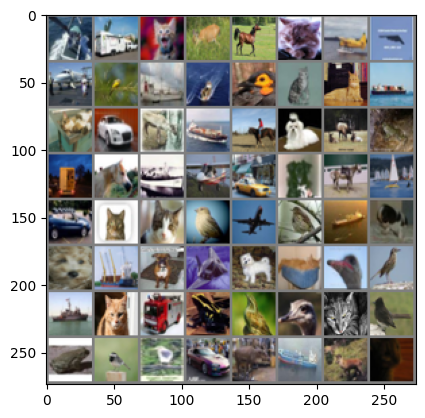

Labels:  ship  truck cat   deer 


In [8]:
dataiter = iter(trainloader)  # Dataloader
# Création d'un itérateur sur les données
# Ici, on crée un itérateur sur trainloader, ce qui permet de récupérer les
# données en batchs. Un itérateur est un objet qui peut traverser une
# séquence d'éléments (ici les images et labels) un par un.


images, labels = next(dataiter)  # Récupère le premier batch d'images et labels
#La fonction next() récupère le prochain batch d'images et de labels.
#Le batch contient 64 images et leurs 64 labels associés. Ces images seront sous forme de tenseurs,
# et les labels seront des indices (ex: 0 pour "avion", 1 pour "voiture", etc.).


images # 64x3x32x32

# Définir la fonction imshow
def imshow(img):
    img = img / 2 + 0.5  # denormalise les pixels en les ramenant dans l'intervalle [0, 1]
    npimg = img.numpy()  # Convertir en numpy array pour matplotlib
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Affichage avec matplotlib
    plt.show()

imshow(torchvision.utils.make_grid(images))  # Afficher les images sous forme de grille
#La fonction make_grid() prend un batch d'images et les dispose sous forme de grille afin de faciliter
# l'affichage de plusieurs images côte à côte dans une seule image.

# Afficher les labels des images
print('Labels: ', ' '.join(f'{trainset.classes[labels[j]]:5s}' for j in range(4)))  # Affiche les 4 premiers labels

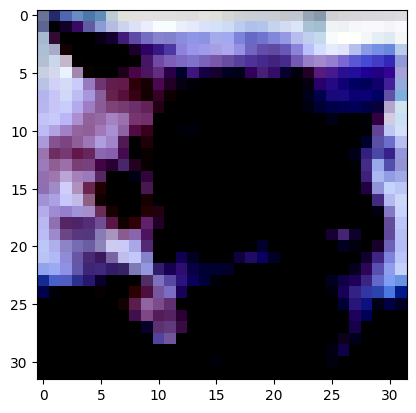

In [9]:
type(images) #toch.tensor
images.shape # (64,3,32,32) = (btch_size,color,height,length) => 64 iamges per batch

image_np = images[5].numpy()
img_reshaped = np.transpose(image_np, (1,2,0))
plt.imshow(img_reshaped)
# we can see that we have the RGB dim at first.
#We then need to reshape that to get more like (32,32,3)
plt.show()



# example
#image_tensor = torch.randn(3, 32, 32)  # rand values

# Convertir le tensor en numpy (de type float32)
#image_np = image_tensor.numpy()

# Affichage de l'image
#plt.imshow(np.transpose(image_np, (1, 2, 0)))  #np.transpose permet de la deuxieme composante de image_np (32) devienne la premiere (donc à la place du 3)
# que la 3e devienne la deuxieme et que la première devienne la dernière.
#plt.show()

In [10]:
#now let's use a preexisting model from torch to train with our data

import torchvision.models as models

# restnet18 est un modele CNN populaire
model = models.resnet18(pretrained=True)# voir diff en True et False en termes d'accuracy
# pretrained = True pour avoir la version préentrainnée qui a deja appris à
# identifier ds pattern (bords, textures motifs...)

# adapter la sortie (on a 10 feaetures et resnet18 1000)
model.fc = torch.nn.Linear(model.fc.in_features, 10) # model.fc = derniere couche (fully connected) de resnet18
# Entrées de model.fc (in_features) : 512 (correspondant à la sortie du global average pooling).
# Sorties de model.fc (out_features) : 1000.
# Mais cela est remplacé par 10 via torch.nn.Linear() => in 512 out 10

# architeture of the Model is built

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 163MB/s]


In [11]:
# Optimizer:
import torch.optim as optim

criterion = torch.nn.CrossEntropyLoss()
# CrossEntropyLoss = Softmax + Log + NLLLoss
# Idéal pour classification multi-classes
# Plus stable que MSELoss pour des classes mutuellement exclusives

optimizer = optim.Adam(model.parameters(), lr=0.001) # on prend Adam qui possede certains avantages par rapport a SGD



In [13]:

#train
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0 # permet de suivre la loss au fil des itérations
    for i, data in enumerate(trainloader, 0): #: Pour chaque batch dans le trainloader, nous extrayons les images et labels (classes réelles).

        inputs, labels = data
        optimizer.zero_grad()  # Remettre à zéro les gradients
#si on ne les remet pas à zéro, les gradients des itérations précédentes s'ajouteront aux nouveaux, ce qui faussera le training.
        outputs = model(inputs)  # Passer les données par le modèle

        loss = criterion(outputs, labels)  # Calculer la perte

        loss.backward()  # Calculer les gradients

        optimizer.step()  # Mettre à jour les poids du modèle

        running_loss += loss.item()
        if i % 100 == 99: # On réinitialise le running_loss tous les 100 batchs (toutes les 6400 photos)
        #permet d'afficher la moyenne de la perte sur une portion significative de l'entraînement
            print(f"Époque {epoch + 1}, Batch {i + 1}, Perte: {running_loss / 100:.3f}")
            running_loss = 0.0

print("Entraînement terminé")


Époque 1, Batch 100, Perte: 1.345
Époque 1, Batch 200, Perte: 1.063
Époque 1, Batch 300, Perte: 0.967
Époque 1, Batch 400, Perte: 0.910
Époque 1, Batch 500, Perte: 0.848
Époque 1, Batch 600, Perte: 0.812
Époque 1, Batch 700, Perte: 0.817
Époque 2, Batch 100, Perte: 0.655
Époque 2, Batch 200, Perte: 0.650
Époque 2, Batch 300, Perte: 0.659
Époque 2, Batch 400, Perte: 0.655
Époque 2, Batch 500, Perte: 0.633
Époque 2, Batch 600, Perte: 0.619
Époque 2, Batch 700, Perte: 0.637
Époque 3, Batch 100, Perte: 0.527
Époque 3, Batch 200, Perte: 0.505
Époque 3, Batch 300, Perte: 0.498
Époque 3, Batch 400, Perte: 0.562
Époque 3, Batch 500, Perte: 0.531
Époque 3, Batch 600, Perte: 0.515
Époque 3, Batch 700, Perte: 0.497
Époque 4, Batch 100, Perte: 0.383
Époque 4, Batch 200, Perte: 0.380
Époque 4, Batch 300, Perte: 0.380
Époque 4, Batch 400, Perte: 0.464
Époque 4, Batch 500, Perte: 0.484
Époque 4, Batch 600, Perte: 0.418
Époque 4, Batch 700, Perte: 0.411
Époque 5, Batch 100, Perte: 0.262
Époque 5, Batc

In [14]:
#model evaluation
correct = 0
total = 0
with torch.no_grad():  # Pas de calcul des gradients pendant l'évaluation
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Prendre la classe avec la probabilité maximale
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Précision sur le dataset de test: {100 * correct / total:.2f}%') # 79% test_accuracy

# detailed explanation next cell

Précision sur le dataset de test: 79.72%


Explication détaillée :
outputs : C'est le tensor qui contient les résultats bruts (logits ou probabilités) du modèle pour chaque classe, généralement avec la forme (batch_size, num_classes). Chaque ligne de ce tensor contient les scores pour chaque classe pour une instance du batch.

1 : C'est la dimension sur laquelle on applique torch.max. La dimension 1 fait référence aux colonnes (les scores des classes) dans chaque ligne de outputs. Autrement dit, pour chaque exemple dans le batch, on cherche la classe avec le score le plus élevé.

torch.max(outputs, 1) renvoie deux valeurs :

Les valeurs maximales (les scores les plus élevés pour chaque exemple), mais ces valeurs ne nous intéressent pas directement ici.
Les indices des classes qui ont ces scores maximaux. Ce sont les indices des classes prédites, et c'est ce qu'on utilise pour la prédiction finale.
Pourquoi _, predicted ?
Le premier élément retourné par torch.max (les valeurs maximales) n'est pas nécessaire dans ce cas, donc on utilise un underscore (_) pour l'ignorer.
Le deuxième élément retourné par torch.max sont les indices des classes avec la plus haute probabilité, et c'est ce qu'on affecte à la variable predicted.

Si on avait utilisé torch.max(outputs, 0), on aurait eu:
Les valeurs maximales pour chaque colonne, c'est-à-dire le score le plus élevé parmi tous les exemples pour chaque classe.
Les indices des exemples (lignes) où ces valeurs maximales se produisent pour chaque classe.